## Analysis of Epinions Dataset Part 2

The goal of the second analysis task is to train linear regression models to predict users' ratings towards items. This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned Epinions sub-dataset that is different from the one in Portfolio 1. 

### Import Cleaned Epinions Dataset
The csv file named 'Epinions_cleaned_data_portfolio_2.csv'is provided. Please import the csv file (i.e., 'Epinions_cleaned_data_portfolio_2') and print out its total length.

In [1]:
# your code and solution
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

sns.set_theme()


In [2]:
epinion = pd.read_csv('files/Epinions_cleaned_data_portfolio_2.csv')
epinion.shape


(2899, 8)

### Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column. 
* As our goal is to predict ratings given other columns, please get the correlations between helpfulness/gender/category/review and rating by using the `corr()` method.
* To get the correlations between different features, you may need to first convert the categorical features (i.e., gender, category and review) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding rating (positive or negative). Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for rating prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [3]:
# your code and solution
epinion.head()


,userId,timestamp,review,item,rating,helpfulness,gender,category
0,4259,11900,"Finally, Something for (Relatively) Nothing",MyPoints.com,4.0,4.0,F,Online Stores & Services
1,4259,12000,Shocking!,Sixth Sense,5.0,4.0,F,Movies
2,4259,12000,Simply Shaggadelic!,Austin Powers: The Spy Who Shagged Me,5.0,4.0,F,Movies
3,4259,12000,Better Than The First!,Toy Story 2,5.0,3.0,F,Movies
4,4259,12000,Blair Witch made me appreciate this,Star Wars Episode I: The Phantom Menace,2.0,4.0,F,Movies


In [4]:
epinion.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2899 entries, 0 to 2898
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       2899 non-null   int64  
 1   timestamp    2899 non-null   int64  
 2   review       2899 non-null   object 
 3   item         2899 non-null   object 
 4   rating       2899 non-null   float64
 5   helpfulness  2899 non-null   float64
 6   gender       2899 non-null   object 
 7   category     2899 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 181.3+ KB


In [5]:
# descriptive statistics
epinion.describe()

,userId,timestamp,rating,helpfulness
count,2899.000000,2899.000000,2899.000000,2899.000000
mean,5430.148672,56403.285271,3.671266,3.875474
std,3460.227028,37664.826368,1.345406,0.330237
min,46.000000,10100.000000,1.000000,3.000000
25%,1676.000000,20500.000000,3.000000,4.000000
50%,5985.000000,52101.000000,4.000000,4.000000
75%,8626.000000,82500.000000,5.000000,4.000000
max,10815.000000,123199.000000,5.000000,4.000000


#### Encode categorical features

[Text(0, 0, 'Online Stores & Services'),
 Text(1, 0, 'Movies'),
 Text(2, 0, 'Hotels & Travel'),
 Text(3, 0, 'Games'),
 Text(4, 0, 'Personal Finance'),
 Text(5, 0, 'Media'),
 Text(6, 0, 'Kids & Family'),
 Text(7, 0, 'Restaurants & Gourmet'),
 Text(8, 0, 'Books')]

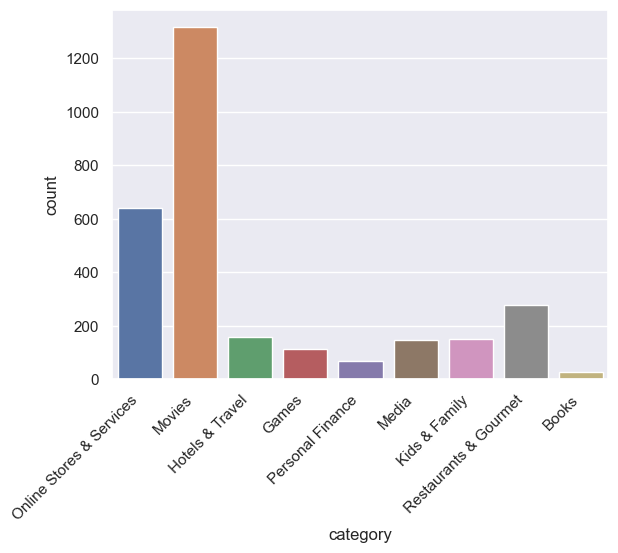

In [6]:
category_plot = sns.countplot(x=epinion['category'], label = 'Count')
category_plot.set_xticklabels(category_plot.get_xticklabels(),
                  rotation=45,
                  horizontalalignment='right')

In [7]:
ord_enc = OrdinalEncoder()

# encode category feature
epinion['category_code'] = ord_enc.fit_transform(epinion[['category']])
epinion[['category', 'category_code']].head(10)


,category,category_code
0,Online Stores & Services,6.0
1,Movies,5.0
2,Movies,5.0
3,Movies,5.0
4,Movies,5.0
5,Hotels & Travel,2.0
6,Online Stores & Services,6.0
7,Movies,5.0
8,Hotels & Travel,2.0
9,Movies,5.0


<AxesSubplot: xlabel='gender', ylabel='count'>

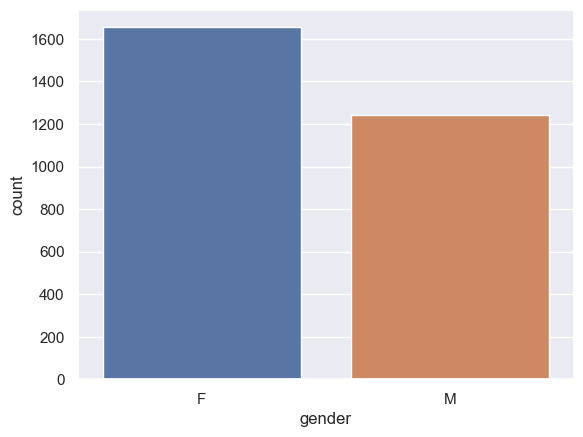

In [8]:
sns.countplot(x=epinion['gender'], label = 'Count')

In [9]:
# encode gender value
epinion['gender_code'] = ord_enc.fit_transform(epinion[['gender']])
epinion[['gender', 'gender_code']].tail(10)


,gender,gender_code
2889,M,1.0
2890,M,1.0
2891,M,1.0
2892,F,0.0
2893,F,0.0
2894,F,0.0
2895,F,0.0
2896,F,0.0
2897,F,0.0
2898,F,0.0


In [10]:
# encode review value
epinion['review_code'] = ord_enc.fit_transform(epinion[['review']])
epinion[['review', 'review_code']].tail(10)


,review,review_code
2889,EBAY TAKES MY PAY ???,739.0
2890,Sophia Loves The Teletubbies ???,2048.0
2891,My Pal is Pay Pal,1617.0
2892,one word....Sick!,2835.0
2893,In the eye of the beholder,1311.0
2894,I dare you to sleep through this soon to be cl...,1221.0
2895,Another movie to keep us out of the water!!!!,379.0
2896,Miles above other films.,1546.0
2897,This could be the beginning of a comedy era.,2431.0
2898,Maybe it should have been cut?,1519.0


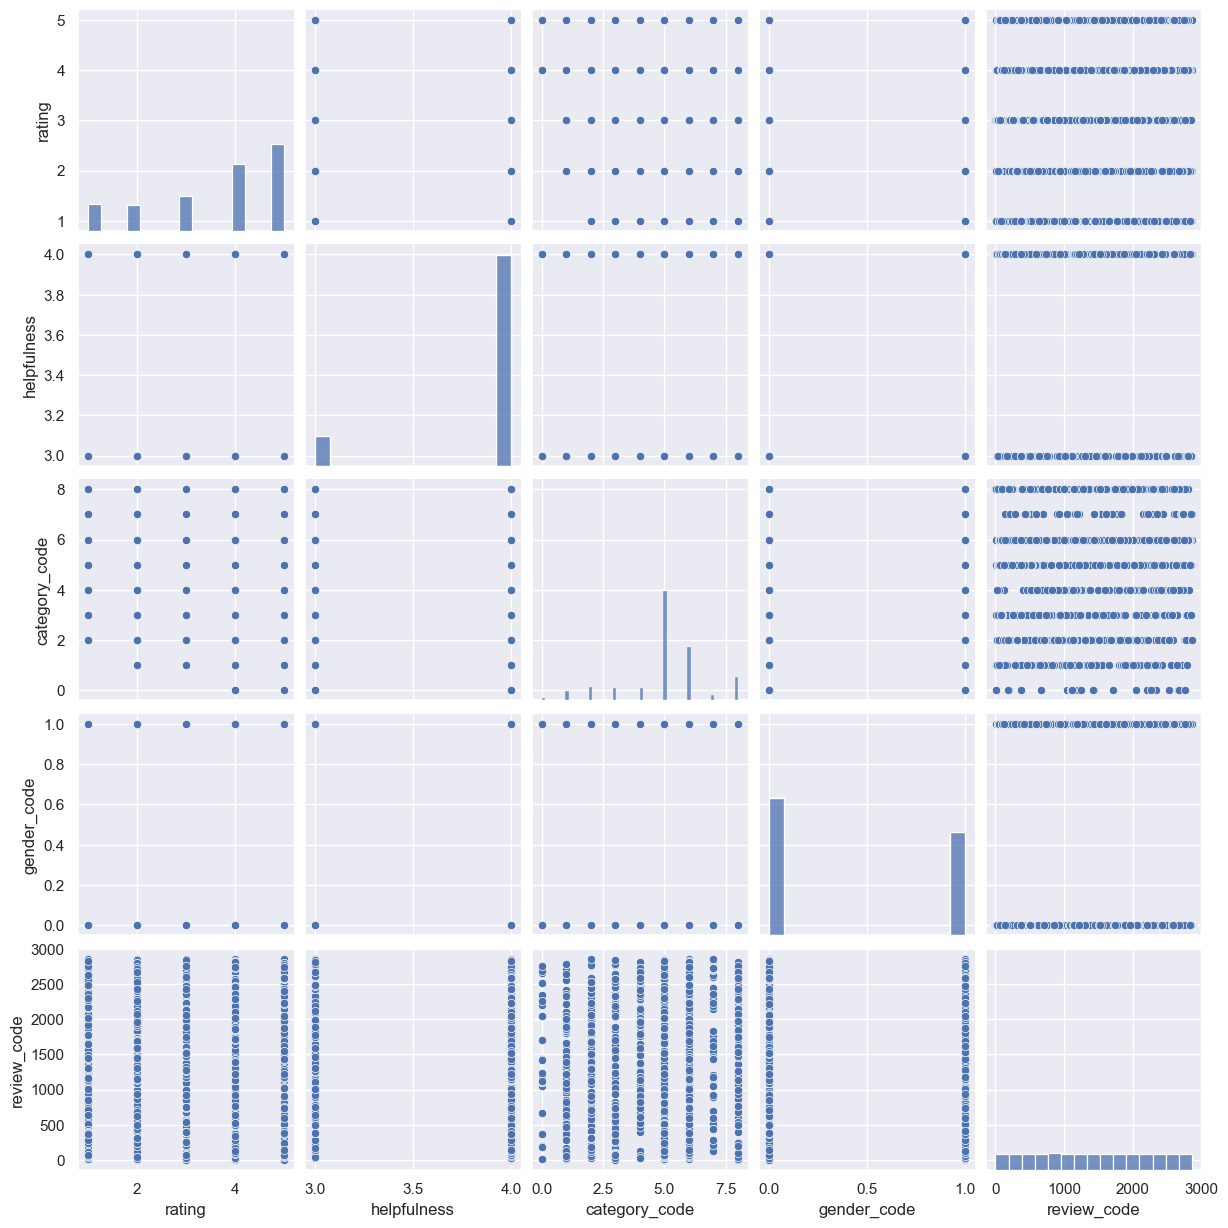

In [11]:
# pairpolot
sns.pairplot(data=epinion, vars=[
             'rating', 'helpfulness', 'category_code', 'gender_code', 'review_code'])


#### Correlation

In [12]:
epinion.corr()


/var/folders/wn/qqns388d55l547dg89zgbmfw0000gn/T/ipykernel_58078/546783211.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  epinion.corr()


,userId,timestamp,rating,helpfulness,category_code,gender_code,review_code
userId,1.000000,-0.036399,0.008164,-0.016841,0.015408,0.056183,0.013212
timestamp,-0.036399,1.000000,0.019860,0.003638,0.037118,-0.049244,-0.025036
rating,0.008164,0.019860,1.000000,-0.016832,-0.140576,0.018105,-0.062071
helpfulness,-0.016841,0.003638,-0.016832,1.000000,-0.000189,-0.046627,0.016170
category_code,0.015408,0.037118,-0.140576,-0.000189,1.000000,-0.017644,0.012047
gender_code,0.056183,-0.049244,0.018105,-0.046627,-0.017644,1.000000,-0.014422
review_code,0.013212,-0.025036,-0.062071,0.016170,0.012047,-0.014422,1.000000


<AxesSubplot: >

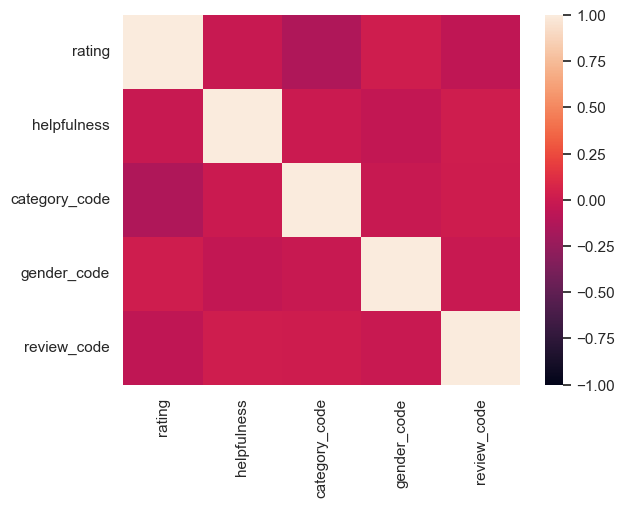

In [13]:
sns.heatmap(data=epinion[['rating', 'helpfulness', 'category_code', 'gender_code', 'review_code']
        ].corr(), vmax=1, vmin=-1)

In [14]:
# compare absolute value of correlation to find most and least correlated pair
rating_correlated = epinion[['rating', 'helpfulness', 'category_code', 'gender_code', 'review_code']
        ].corr().rating.abs().sort_values().reset_index().drop(index=4).rename({'index': 'feature', 'rating':'correlation'}, axis=1)
rating_correlated

,feature,correlation
0,helpfulness,0.016832
1,gender_code,0.018105
2,review_code,0.062071
3,category_code,0.140576


Text(0.5, 1.0, 'Comparision between Correlation of four Features regarding Rating')

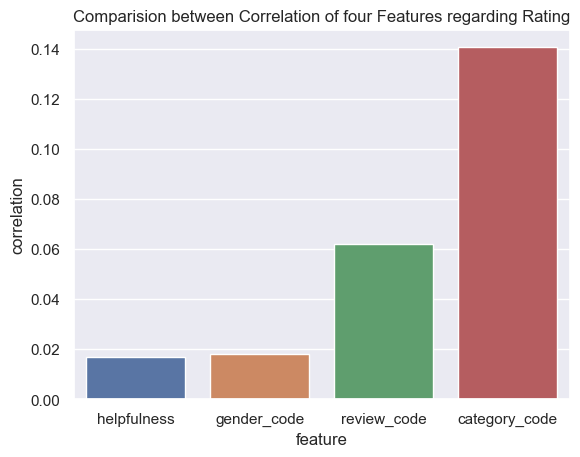

In [15]:
sns.barplot(data=rating_correlated, x='feature', y='correlation').set_title('Comparision between Correlation of four Features regarding Rating')

As can be seen above:
- **category_code and review** are two **most** correlated input features with rating, at absolute 0.141 and 0.062 respectively.
- **helpfulness and gender_code** are two **least** correlated features with rating, at absolute 0.017 and 0.018 respectively.

In general, the correlations between features in this Epinion data are low. That is, there's no correlation value goes near to 1 or -1. This shows that if we use these features to train a regression model for **rating prediction**, the model will not perform well. Furthermore, using the least correlated features to train the models will lead to having predictions with MSE while using the most correlated features will improve the predictions in terms of accuracy.

We will conduct the experiment by training the different models with two most correlated features and two least correlated features regarding rating. Then we will compare the predictions of these models and evaluate the result, in terms of metrics like Mean Squared Error or R squared score, to see if verify the theory above.

### Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set. 
* To further investigate whether the size of the training/testing data affects the model performance, please random split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data. 
* Print the shape of training and testing sets in the two cases. 

In [16]:
# your code and solution
RANDOM_STATE = 142
train_1, test_1 = train_test_split(
    epinion, test_size=0.9, random_state=RANDOM_STATE)
train_2, test_2 = train_test_split(
    epinion, test_size=0.1, random_state=RANDOM_STATE)


In [17]:
print('Shape of train and test sets in case 1:', train_1.shape, test_1.shape)
print('Shape of train and test sets in case 2:', train_2.shape, test_2.shape)


Shape of train and test sets in case 1: (289, 11) (2610, 11)
Shape of train and test sets in case 2: (2609, 11) (290, 11)


Text(0.5, 1.0, 'Comparision between train-test size for 2 cases')

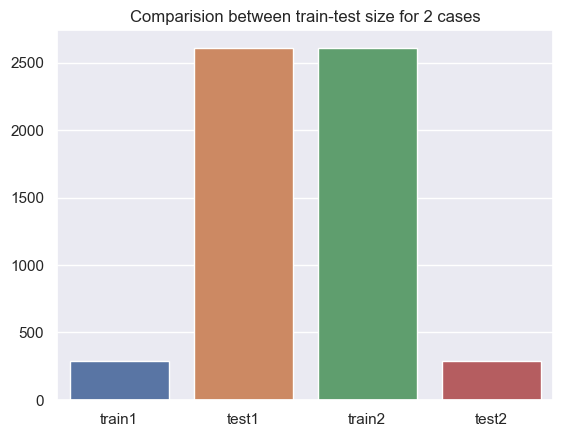

In [18]:
sns.barplot(x=['train1', 'test1', 'train2', 'test2'], y=[len(train_1), len(test_1), len(train_2), len(test_2)]).set_title('Comparision between train-test size for 2 cases')


### Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results. 
* To investigate whether feature selection affects the model performance, please select __two most correlated features and two least correlated features__ regarding rating, respectively. 
* Train __four__ linear regression models by following the conditions:
    - (model-a) using the training/testing data in __case 1__ with __two most__ correlated input features
    - (model-b) using the training/testing data in __case 1__ with __two least__ correlated input features
    - (model-c) using the training/testing data in __case 2__ with __two most__ correlated input features
    - (model-d) using the training/testing data in __case 2__ with __two least__ correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

#### (model-a) using the training/testing data in __case 1__ with __two most__ correlated input features

In [19]:
model_a = linear_model.LinearRegression()
X_train_a = train_1[['category_code', 'review_code']]
y_train_1 = train_1['rating']
model_a.fit(X_train_a, y_train_1)
print("y = x *", model_a.coef_, "+", model_a.intercept_)


y = x * [-1.42431568e-01 -1.23547895e-04] + 4.613642966456845


In [20]:
def evaluate_model(model, X, y):
    predicted = model.predict(X)
    mse = mean_squared_error(y, predicted)
    r2 = r2_score(y, predicted)
    rmse = mean_squared_error(y, predicted, squared=False)
    print("Root MSE", rmse)
    print("MSE:", mse)
    print("R Squared:", r2)
    return [mse, r2, rmse]


In [21]:
# Evaluate based on train data
evaluate_model(model_a, X_train_a, y_train_1)


Root MSE 1.3523441020280678
MSE: 1.828834570290101
R Squared: 0.03404735252514057


[1.828834570290101, 0.03404735252514057, 1.3523441020280678]

#### (model-b) using the training/testing data in __case 1__ with __two least__ correlated input features

In [22]:
model_b = linear_model.LinearRegression()
X_train_b = train_1[['helpfulness','gender_code']]
model_b.fit(X_train_b, y_train_1)
print("y = x *", model_b.coef_, "+", model_b.intercept_)


y = x * [-0.32823006  0.14497204] + 4.9219995536846035


In [23]:
evaluate_model(model_b, X_train_b, y_train_1)


Root MSE 1.3696890328861595
MSE: 1.8760480468086231
R Squared: 0.009110169370119436


[1.8760480468086231, 0.009110169370119436, 1.3696890328861595]

#### (model-c) using the training/testing data in __case 2__ with __two most__ correlated input features

In [24]:
model_c = linear_model.LinearRegression()
X_train_c = train_2[['category_code','review_code']]
y_train_2 = train_2['rating']
model_c.fit(X_train_c, y_train_2)
print("y = x *", model_c.coef_, "+", model_c.intercept_)


y = x * [-1.08951296e-01 -7.77769823e-05] + 4.332388331792293


In [25]:
evaluate_model(model_c, X_train_c, y_train_2)


Root MSE 1.333274875951561
MSE: 1.77762189484365
R Squared: 0.020495764175804787


[1.77762189484365, 0.020495764175804787, 1.333274875951561]

#### (model-d) using the training/testing data in __case 2__ with __two least__ correlated input features

In [26]:
model_d = linear_model.LinearRegression()
X_train_d = train_2[['helpfulness','gender_code']]
model_d.fit(X_train_d, y_train_2)
print("y = x *", model_d.coef_, "+", model_d.intercept_)


y = x * [-0.10823554  0.00921578] + 4.085007106258729


In [27]:
evaluate_model(model_d, X_train_d, y_train_2)


Root MSE 1.3466499573711623
MSE: 1.8134661076877534
R Squared: 0.000744905788863437


[1.8134661076877534, 0.000744905788863437, 1.3466499573711623]

### Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [28]:
# your code and solution
evaluation_results = []
# model-a
X_test_a = test_1[['category_code', 'review_code']]
y_test_1 = test_1['rating']
print('Evaluation for model-a:')
score = evaluate_model(model_a, X_test_a, y_test_1)
score.insert(0,'model_a')
evaluation_results.append(score)
print()

# model-b
X_test_b = test_1[['helpfulness','gender_code']]
print('Evaluation for model-b:')
score = evaluate_model(model_b, X_test_b, y_test_1)
score.insert(0,'model_b')
evaluation_results.append(score)
print()

# model-c
X_test_c = test_2[['category_code','review_code']]
y_test_2 = test_2['rating']
print('Evaluation for model-c:')
score = evaluate_model(model_c, X_test_c, y_test_2)
score.insert(0,'model_c')
evaluation_results.append(score)
print()

# model-d
X_test_d = test_2[['helpfulness','gender_code']]
print('Evaluation for model-d:')
score = evaluate_model(model_d, X_test_d, y_test_2)
score.insert(0,'model_d')
evaluation_results.append(score)

Evaluation for model-a:
Root MSE 1.3289492097620557
MSE: 1.7661060021271924
R Squared: 0.018829998818226446

Evaluation for model-b:
Root MSE 1.3469285081895148
MSE: 1.8142164061736321
R Squared: -0.00789800342979552

Evaluation for model-c:
Root MSE 1.2946667298884127
MSE: 1.6761619414799562
R Squared: 0.04840673922298222

Evaluation for model-d:
Root MSE 1.3298478251507913
MSE: 1.7684952380582892
R Squared: -0.0040128633195315455


### Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

In [29]:
# your code and solution
evaluation_results

[['model_a', 1.7661060021271924, 0.018829998818226446, 1.3289492097620557],
 ['model_b', 1.8142164061736321, -0.00789800342979552, 1.3469285081895148],
 ['model_c', 1.6761619414799562, 0.04840673922298222, 1.2946667298884127],
 ['model_d', 1.7684952380582892, -0.0040128633195315455, 1.3298478251507913]]

In [30]:
# create dataframe to store evaluation metrics
evaluation_df = pd.DataFrame(evaluation_results, columns=['model','MSE', 'R squared', 'RMSE'])
evaluation_df

,model,MSE,R squared,RMSE
0,model_a,1.766106,0.018830,1.328949
1,model_b,1.814216,-0.007898,1.346929
2,model_c,1.676162,0.048407,1.294667
3,model_d,1.768495,-0.004013,1.329848


#### Mean Squared Error

We will first look at the comparision between MSE for our 4 models. Here, the differences in MSE is small, so we will use log scale on the y axis (MSE) to better differentiate the 4 values.

Text(0.5, 1.0, 'MSE comparision for 4 models')

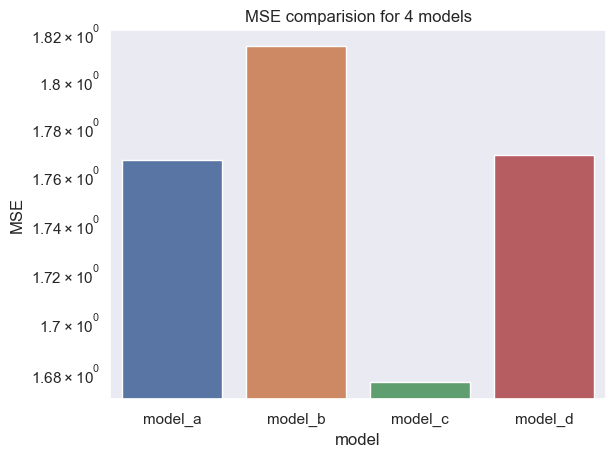

In [31]:
mse_plot = sns.barplot(data=evaluation_df, x='model', y='MSE')
mse_plot.set_yscale("log")
mse_plot.set_title('MSE comparision for 4 models')

As illustrated in the chart above, model_c is having the **least** MSE, and model_b shows the **most** error, while this value of model_a and model_d shows nearly no differences.

The fact that model_c show the least error is expected since it was trained with most correlated features and most training data. On the opposite, model_b was trained with the least data and also least correlated features, therefore it have the largest MSE score.

Model_a was trained with the most correlated features but only 10% of the whole data, therefore having fairly high MSE score. This can be interpreted as this model having low accuracy on predicting the unforseen data, which in this case is the rest 90% test data. On the other hand, model_d although was trained with most of the dataset, also having the same MSE as model_a. This can be explained by the fact that model_d was trained with two least correlated features regarding the target, resulting it predict the ranking score having high error with the actual data.

**NOTE: The event that model_a and model_d having nearly the same MSE also depends on how we randomize our train-test data(random_state). In a different event, MSE of model_a and model_d can be significantly different, but they should usally higher than that of model_c, and lower than that of model_b**

#### $R^2$

Text(0.5, 1.0, 'R squared comparision for 4 models')

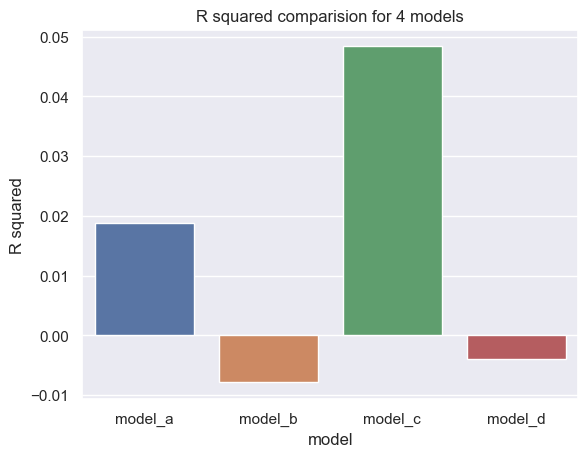

In [32]:
sns.barplot(data=evaluation_df, x='model', y='R squared').set_title('R squared comparision for 4 models')

As can be seen from the barchart above, $R^2$ score of model_c is highest among the four, and model_b is the lowest. Model_d have slightly better $R^2$ score than model_b, rank third, while the seccond place belong to model_a.

Model_b having highest $R^2$ is expected, since, as the same sense when we analyse MSE, it was trained with most correlated features and most training data. Highest $R^2$ score shows that this model best explain the variance among our actual data, out of the four model.

With that in mind, model_b ranking last and model_d ranking third is because they were trained with the two least correlated features, therefore these models do not follow the trend of the data. Model_d is slightly better since it was trained with more data than model_b.

Lastly, model_a ranking seccond shows that it can respond to the actual trend of data, but not as good as model_c. This is because it was trained with lesser data therefore perform more poorly.

#### Conclusion

Text(0.5, 1.0, 'Relation between actual and predicted Ranking by model_c')

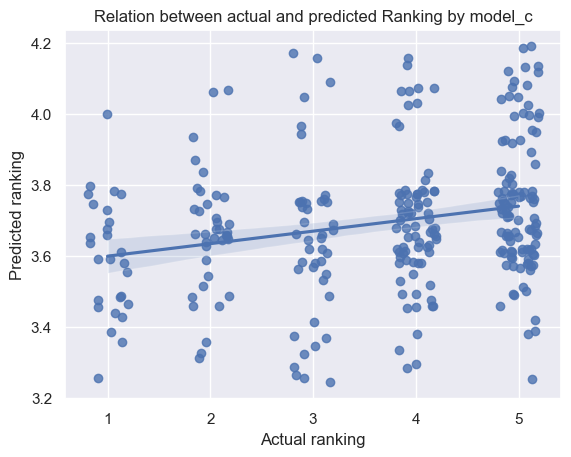

In [35]:
predict_c = model_c.predict(X_test_c)
sns.regplot(x=y_test_2, y=predict_c, x_jitter=.2)
plt.ylabel('Predicted ranking')
plt.xlabel('Actual ranking')
plt.title('Relation between actual and predicted Ranking by model_c')

In conclusion, in this exercise, we have examined four models with different train-test size and different input features. The evaluations of the four cases has been describe above, and they have matched our initial assumption, that are:
- The model was trained with most correlated features and most training data perform best among examined models.
- In the opposite, the model was trained with least correlated features and least training data perform worst among examined models.